<a href="https://colab.research.google.com/github/pgbeermann2017/QM206/blob/master/Clase10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import requests

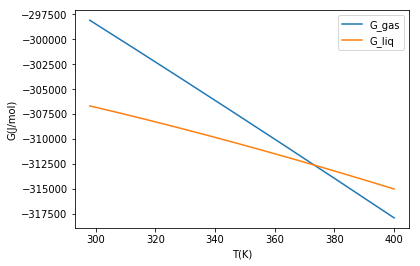

In [0]:
deltaH_gas_298=-241.826   # kJ/mol
deltaS_gas_298=188.835    #J/K.mol
A=30.09200
B=6.832514
C=6.793435
D=-2.534480	
E=0.082139

dT=0.001
T=np.arange(298,400,dT)
t=T/1000

Cp=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_gas=np.cumsum(Cp*dT)+deltaH_gas_298*1000
deltaS_gas=np.cumsum(Cp/T*dT)+deltaS_gas_298
deltaG_gas=deltaH_gas-T*deltaS_gas

##Cálculo para el H2Oliq

deltaH_liq_298=-285.830    #kJ/mol
deltaS_liq_298=69.95       #J/K.mol

A=-203.6060
B=1523.290
C=-3196.413
D=2474.455
E=3.855326

Cp=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_liq=np.cumsum(Cp*dT)+deltaH_liq_298*1000
deltaS_liq=np.cumsum(Cp/T*dT)+deltaS_liq_298
deltaG_liq=deltaH_liq-T*deltaS_liq

plt.plot(T,deltaG_gas,label="G_gas")
plt.plot(T,deltaG_liq,label="G_liq")
plt.xlabel("T(K)")
plt.ylabel("G(J/mol)")
plt.legend()
plt.show()

In [0]:
d=(deltaG_gas-deltaG_liq)**2
minimo=np.min(d)
n=np.where(minimo==d)[0][0]
print("T ebullición H2O=",T[n])

T ebullición= 373.2149999982214


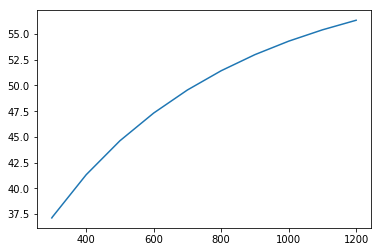

In [23]:
## Coeficiente de Shomate

url_CO2="https://janaf.nist.gov/tables/C-095.txt"
data=requests.get(url_CO2).text
data=data.split("\n")[3:-1]
T=[]
Cp=[]
for x in data:
  fila=x.split("\t")
  datos=[]
  for s in fila:
    a=float(s)
    datos.append(a)
  if(datos[0]>=298 and datos[0]<=1200):
    T.append(datos[0])
    Cp.append(datos[1])
T=np.array(T)
Cp=np.array(Cp)
plt.plot(T,Cp)

In [24]:
t=T/1000
Y=Cp
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print(beta)

[ 24.99732126  55.18702293 -33.69141903   7.94840627  -0.13663732]
